In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_loan=pd.read_csv('Loan_prediction.csv')
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [91]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [92]:
df_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The given loan prediction dataset has 13 columns in which 12 independent columns and 1 dependent columns which decides the loan approval from the bank.

We can split the dependent and independent variable.

In [93]:
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [94]:
df_loan0=df_loan.dropna(subset=['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History'])
df_loan0

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [95]:
df_loan0.iloc[:,:-1]
y1=df_loan0.iloc[:,-1]


In [96]:
# Splitting the Loan_prediction dataset
df_loan1=df_loan.iloc[:,:-1]
df_loan.iloc[:,-1]
df_loan1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [97]:
df_loan2=df_loan1.drop(['Loan_ID'],axis=1)
df_loan2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [98]:
df_loan2.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [99]:
#Lets check the NULL value in our independent dataset

df_loan2.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

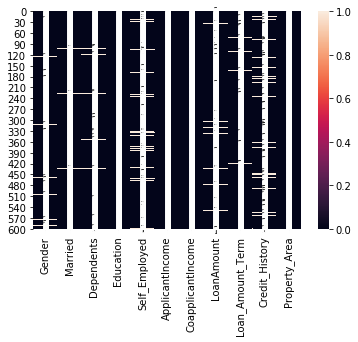

In [100]:
sns.heatmap(df_loan2.isnull(),annot=True)

The above observation and result shows that there are many null values present in our dataset. So we will apply the dropna method to remove the null value from all those columns.

In [101]:
df_loan3=df_loan2.dropna(subset=['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History'])

In [102]:
df_loan3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


Now , our independent data set has no null values.


In [103]:
df_loan3.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In the above dataset, independnt variables like 'Loan_ID','Dependents' and 'Education' has no relevance with the Loan Status prediction. So we will drop all these columns from our dataset.

In [104]:
df_loan4=df_loan3.drop(['Dependents','Education','Married'],axis=1) # we will keep axis as 1 for deleting the column values from the dataset

df_loan4

,Gender,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,Yes,5417,4196.0,267.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...
609,Female,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,No,7583,0.0,187.0,360.0,1.0,Urban


In our given dataset, Columns- "Gender","Self_Employed",and "Property_Area"  are categorical features and independent variables should be continuous. 

We will convert the categorical features into continuous 

In [105]:
df1=pd.get_dummies(df_loan4['Gender'])
df1

,Female,Male
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
...,...,...
609,1,0
610,0,1
611,0,1
612,0,1


In [106]:
df2=pd.get_dummies(df_loan4['Self_Employed'])
df2

,No,Yes
1,1,0
2,0,1
3,1,0
4,1,0
5,0,1
...,...,...
609,1,0
610,1,0
611,1,0
612,1,0


In [107]:
df3=pd.get_dummies(df_loan4['Property_Area'])
df3

,Rural,Semiurban,Urban
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [108]:
df_loan5=pd.concat([df1,df2,df3,df_loan4],axis=1)
df_loan5

,Female,Male,No,Yes,Rural,Semiurban,Urban,Gender,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,0,1,0,0,Male,No,4583,1508.0,128.0,360.0,1.0,Rural
2,0,1,0,1,0,0,1,Male,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,0,1,1,0,0,0,1,Male,No,2583,2358.0,120.0,360.0,1.0,Urban
4,0,1,1,0,0,0,1,Male,No,6000,0.0,141.0,360.0,1.0,Urban
5,0,1,0,1,0,0,1,Male,Yes,5417,4196.0,267.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,Female,No,2900,0.0,71.0,360.0,1.0,Rural
610,0,1,1,0,1,0,0,Male,No,4106,0.0,40.0,180.0,1.0,Rural
611,0,1,1,0,0,0,1,Male,No,8072,240.0,253.0,360.0,1.0,Urban
612,0,1,1,0,0,0,1,Male,No,7583,0.0,187.0,360.0,1.0,Urban


In [109]:
df_loan5.drop(['Gender','Self_Employed','Property_Area'],axis=1,inplace=True)

In [110]:
df_loan5

,Female,Male,No,Yes,Rural,Semiurban,Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,0,1,1,0,1,0,0,4583,1508.0,128.0,360.0,1.0
2,0,1,0,1,0,0,1,3000,0.0,66.0,360.0,1.0
3,0,1,1,0,0,0,1,2583,2358.0,120.0,360.0,1.0
4,0,1,1,0,0,0,1,6000,0.0,141.0,360.0,1.0
5,0,1,0,1,0,0,1,5417,4196.0,267.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,2900,0.0,71.0,360.0,1.0
610,0,1,1,0,1,0,0,4106,0.0,40.0,180.0,1.0
611,0,1,1,0,0,0,1,8072,240.0,253.0,360.0,1.0
612,0,1,1,0,0,0,1,7583,0.0,187.0,360.0,1.0


In [111]:
# Let us check for the skewness in our dataset
df_loan5.skew()

Female               1.678471
Male                -1.678471
No                  -2.111872
Yes                  2.111872
Rural                0.930738
Semiurban            0.418428
Urban                0.811578
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
dtype: float64

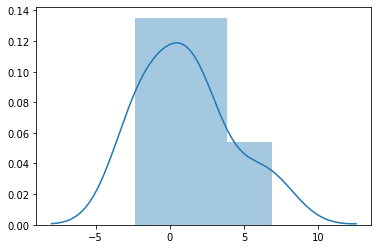

In [112]:
sns.distplot(df_loan5.skew())

We will apply Log Transform method to normalise the skewness 

In [113]:
df_loan4.dtypes

Gender                object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [114]:
for col in df_loan5.columns:
    if df_loan5.skew().loc[col]>0.55:
        df_loan5[col]=np.log1p(df_loan5[col])
df_loan5.skew()

Female               1.678471
Male                -1.678471
No                  -2.111872
Yes                  2.111872
Rural                0.930738
Semiurban            0.418428
Urban                0.811578
ApplicantIncome      0.565144
CoapplicantIncome   -0.150104
LoanAmount          -0.375544
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
dtype: float64

In [115]:
df_loan_sqrt=np.sqrt(df_loan5)
df_loan_sqrt.skew()

Female               1.678471
Male                -1.678471
No                  -2.111872
Yes                  2.111872
Rural                0.930738
Semiurban            0.418428
Urban                0.811578
ApplicantIncome      0.265289
CoapplicantIncome   -0.187179
LoanAmount          -0.770211
Loan_Amount_Term    -2.970170
Credit_History      -2.013253
dtype: float64

In [116]:
from scipy import stats

df_loan_boxcox=stats.boxcox(df_loan5['Loan_Amount_Term'])[0]
pd.Series(df_loan_boxcox).skew()

0.3980507203616528

In [117]:
# We will check for the Outliers in the dataset.

# Applying ZScore method

z_loan=np.abs(stats.zscore(df_loan5))
print(z_loan)

[[0.46719815 0.46719815 0.3992747  ... 0.00484673 0.27554157 0.41319694]
 [0.46719815 0.46719815 2.50454133 ... 1.29477683 0.27554157 0.41319694]
 [0.46719815 0.46719815 0.3992747  ... 0.12215953 0.27554157 0.41319694]
 ...
 [0.46719815 0.46719815 0.3992747  ... 1.34891143 0.27554157 0.41319694]
 [0.46719815 0.46719815 0.3992747  ... 0.75200269 0.27554157 0.41319694]
 [2.14041943 2.14041943 2.50454133 ... 0.0802853  0.27554157 2.42015348]]


In [118]:
threshold=3
print(np.where(z_loan>3))

(array([ 12,  12,  54,  75,  75,  98,  98, 120, 120, 142, 144, 170, 187,
       205, 319, 347, 386, 390, 426, 433, 438, 444, 450, 457], dtype=int64), array([ 9, 10, 10,  9, 10,  9, 10,  7,  9,  7,  7,  7, 10, 10,  7,  7, 10,
        7, 10,  9,  9,  9, 10, 10], dtype=int64))


In [119]:
z_loan=z_loan[(z_loan<3).all(axis=1)]

print(df_loan5.shape)
print(z_loan.shape)

(480, 12)
(460, 12)


In [120]:
# Using IQR method

Q1=df_loan5.quantile(0.25)
Q3=df_loan5.quantile(0.75)

IQR=Q3-Q1

print(IQR)

Female               0.000000
Male                 0.000000
No                   0.000000
Yes                  0.000000
Rural                0.693359
Semiurban            1.000000
Urban                0.693359
ApplicantIncome      0.702391
CoapplicantIncome    7.720573
LoanAmount           0.526543
Loan_Amount_Term     0.000000
Credit_History       0.000000
dtype: float64


In [121]:
print(df_loan5 < (Q1-1.5*IQR)) 
print(df_loan5 > (Q3+1.5*IQR))

     Female   Male     No    Yes  Rural  Semiurban  Urban  ApplicantIncome  \
1     False  False  False  False  False      False  False            False   
2     False  False   True  False  False      False  False            False   
3     False  False  False  False  False      False  False            False   
4     False  False  False  False  False      False  False            False   
5     False  False   True  False  False      False  False            False   
..      ...    ...    ...    ...    ...        ...    ...              ...   
609   False   True  False  False  False      False  False            False   
610   False  False  False  False  False      False  False            False   
611   False  False  False  False  False      False  False            False   
612   False  False  False  False  False      False  False            False   
613   False   True   True  False  False      False  False            False   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [122]:
df_loan_out=df_loan5[~((df_loan5<(Q1-1.5*IQR)) | (df_loan5>(Q3+1.5*IQR)))]
print(df_loan5.shape)
print(df_loan_out.shape)

(480, 12)
(480, 12)


 As per the observation ZScore method has better result then IQR method

Let us start the Visualisation for dataset

C:\Users\Rizwan Khan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Rizwan Khan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


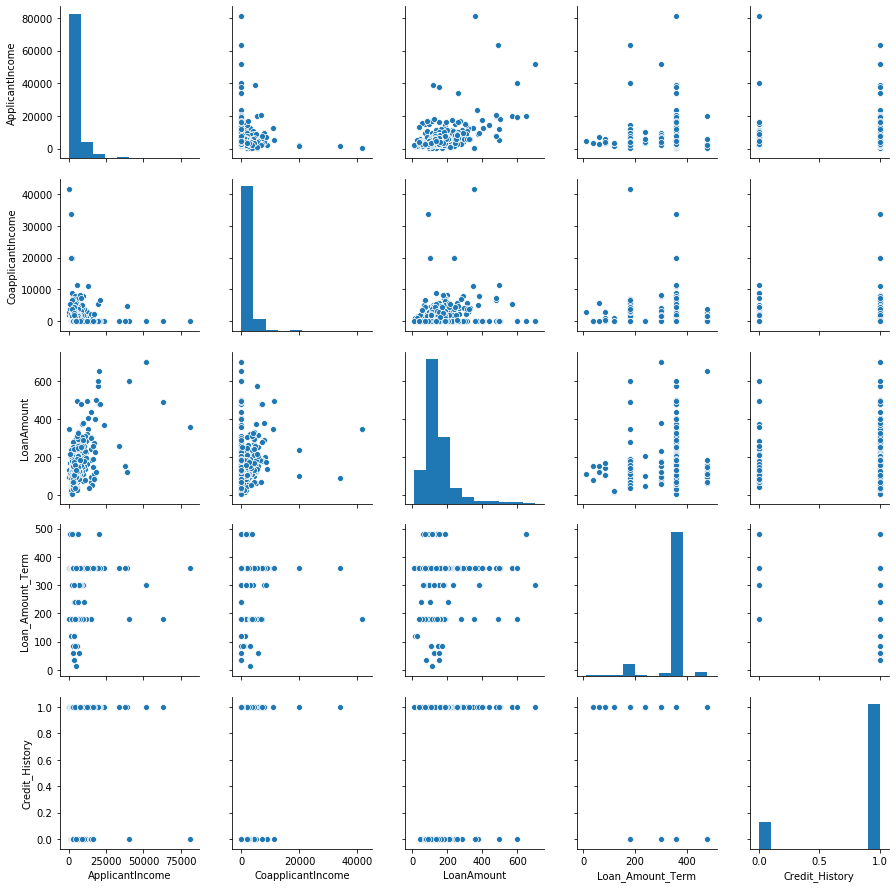

In [123]:
sns.pairplot(df_loan)

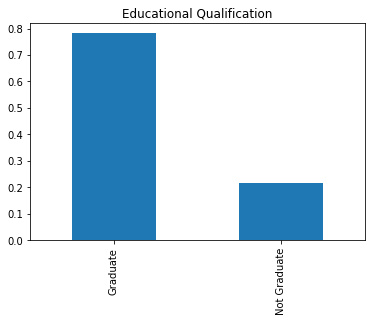

In [124]:
df_loan['Education'].value_counts(normalize=True).plot.bar(title="Educational Qualification")
plt.show()

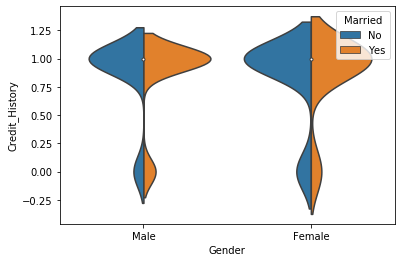

In [125]:
sns.violinplot(x="Gender",y="Credit_History",hue="Married",data=df_loan,split=True)

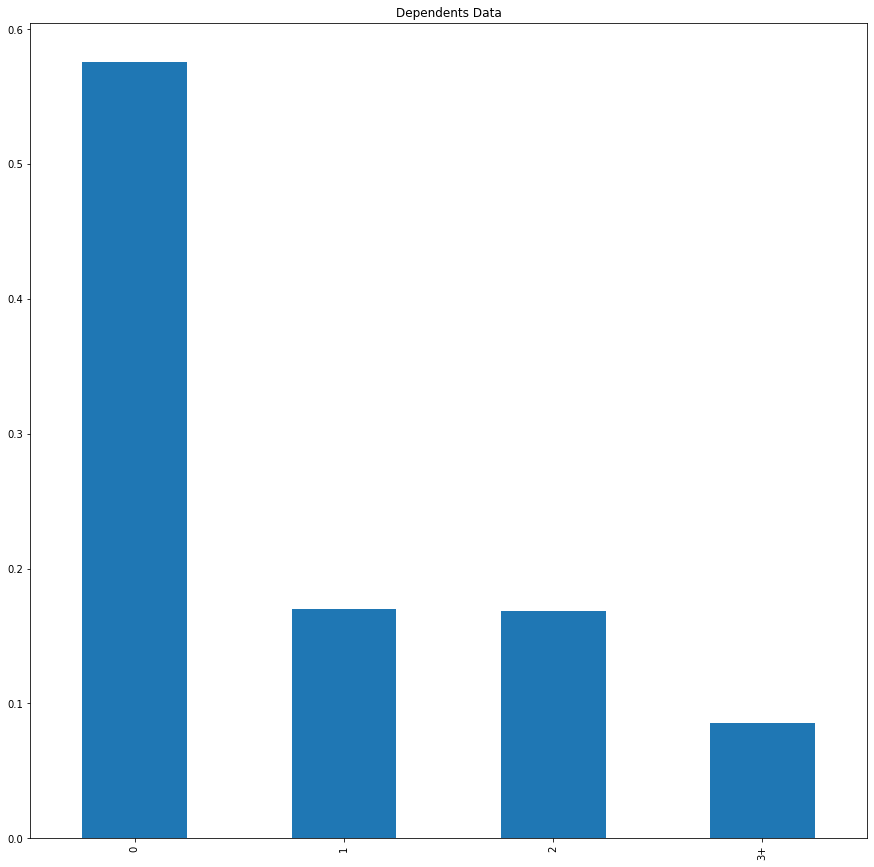

In [126]:
df_loan['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,15),title='Dependents Data')
plt.show()

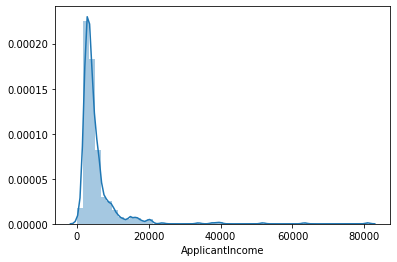

In [127]:
sns.distplot(df_loan['ApplicantIncome'])
plt.show()

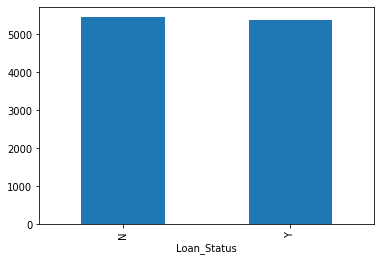

In [128]:
df_loan.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

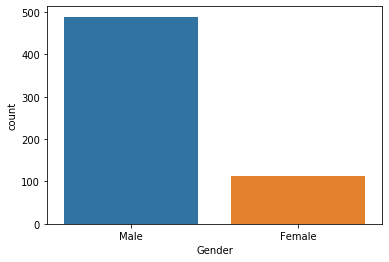

In [129]:
sns.countplot(x='Gender',data=df_loan2)

More of the Male Applicant has apllied for the loan.

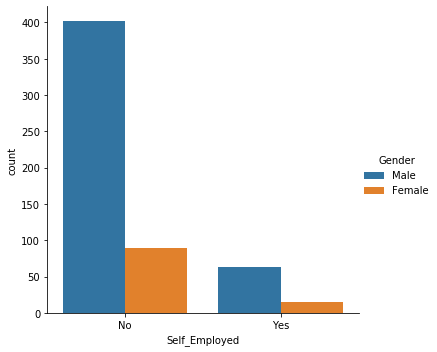

In [130]:
sns.catplot(x='Self_Employed',hue='Gender',kind='count',data=df_loan2)

Most of the Self Employed Applicant were denied loan.

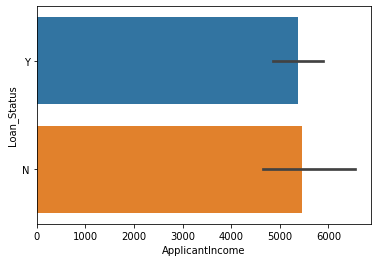

In [131]:
sns.barplot(x="ApplicantIncome",y="Loan_Status",data=df_loan)
plt.show()

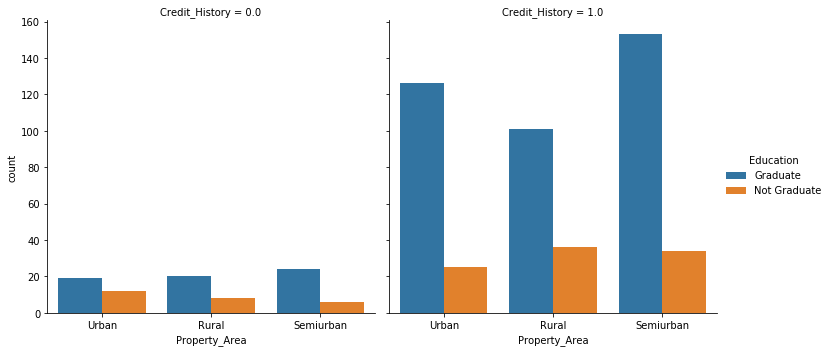

In [132]:
sns.catplot(x='Property_Area',hue='Education',
           kind='count',col='Credit_History',data=df_loan)

# Data Training and Testing

In [133]:
#Splitting the dataset
x=df_loan5
print(x)

       Female  Male  No       Yes     Rural  Semiurban     Urban  \
1    0.000000     1   1  0.000000  0.693359          0  0.000000   
2    0.000000     1   0  0.693359  0.000000          0  0.693359   
3    0.000000     1   1  0.000000  0.000000          0  0.693359   
4    0.000000     1   1  0.000000  0.000000          0  0.693359   
5    0.000000     1   0  0.693359  0.000000          0  0.693359   
..        ...   ...  ..       ...       ...        ...       ...   
609  0.693359     0   1  0.000000  0.693359          0  0.000000   
610  0.000000     1   1  0.000000  0.693359          0  0.000000   
611  0.000000     1   1  0.000000  0.000000          0  0.693359   
612  0.000000     1   1  0.000000  0.000000          0  0.693359   
613  0.693359     0   0  0.693359  0.000000          1  0.000000   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1           8.430327           7.319202    4.859812             360.0   
2           8.006701           0.0000

In [134]:
y=pd.get_dummies(y1,drop_first=True)
y

,Y
1,0
2,1
3,1
4,1
5,1
...,...
609,1
610,1
611,1
612,1


In [135]:
# Applying Test_Train_Split model

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=20)

# Predictive Modelling

In [136]:
# We will apply LogisticRegression to our model to check for the Model accuracy

from sklearn.linear_model import LogisticRegression

logreg_loan=LogisticRegression()
logreg_loan.fit(x_train,y_train)

pred= logreg_loan.predict(x_test)

C:\Users\Rizwan Khan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rizwan Khan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [137]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy_loan=accuracy_score(y_test,pred)
accuracy_loan

0.8416666666666667

Here we are getting 84% percent of accuracy for our Loan_Prediction model using Logistic Regression.

We will try to improve the model accuracy by using GridSearchCV method.

In [139]:
from sklearn.model_selection import GridSearchCV

grid_loan={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_loan=LogisticRegression()
logreg_loan_cv=GridSearchCV(logreg_loan,grid_loan,cv=10,n_jobs=-1)
logreg_loan_cv.fit(x_train,y_train)


print("tuned hyperparameters: best parameters", logreg_loan_cv.best_params_)
print("accuracy:",logreg_loan_cv.best_score_)


tuned hyperparameters: best parameters {'C': 1.0, 'penalty': 'l1'}
accuracy: 0.7944444444444444


C:\Users\Rizwan Khan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rizwan Khan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy score for Loan Prediction model using LogisticRegression is 84% and by using GridSearchCV is 79%. So, We will use the accuracy score by the standard LogisticRegression method.

# The prediction score for Loan_prediction model is 84%

In [140]:
#Saving the predicted model 

from sklearn.externals import joblib
joblib.dump(accuracy_loan,'loan_prediction.pkl')

['loan_prediction.pkl']